In [1]:
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt

In [2]:
cl_camb = np.load('cl_camb_nonlin.npy',allow_pickle=True).item()

In [3]:
ell = np.arange(2,3072)

In [4]:
clnn = {}
n = 5
for i in range(1, n+1):
    for j in range(1, n+1):
        clnn[(i,j)] = cl_camb[f'W{i}xW{j}'][2:3072]*2*np.pi/(ell*(ell+1))

In [5]:
def Tij(clnn,i,j):
    if i==j:
        s = clnn[(j,i)]
        for k in range(1,j-1):
            s += -Tij(clnn,i,k)**2
        return np.sqrt(s)
    if i>j: 
        s = clnn[(j,i)]
        for k in range(1,j-1):
            s += -Tij(clnn,i,k)*Tij(clnn,j,k)
        return s/Tij(clnn,j,j)

Ts = {}
for i in range(1,n+1):
    for j in range(1,i+1):
        Ts[i,j] = Tij(clnn,i,j)

In [6]:
n=5
seeds = [np.random.randint(2**31) for i in range(n)]

maps = [0 for i in range(n)]
for i in range(1,n+1): 
    for j in range(1,i+1):
        pmask = clnn[i,j]>=0
        np.random.seed(seeds[j-1])
        maps[i-1] += hp.synfast(np.concatenate((np.array([0,0]),Ts[i,j]**2)),nside=1024)
        mmask = clnn[i,j]<0
        np.random.seed(seeds[j-1])
        maps[i-1] -= hp.synfast(np.concatenate((np.array([0,0]),Ts[i,j]**2*mmask)),nside=1024)

The recovered correlation between 1st and 2nd bin looks OK.

Text(0.5, 0, '$\\ell$')

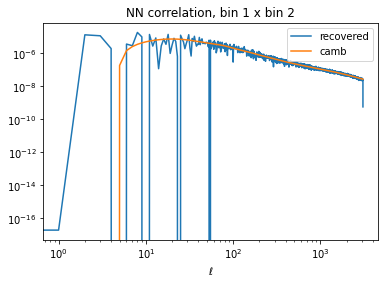

In [7]:
cl_recover = hp.anafast(maps[0], maps[1], lmax=3072)
plt.loglog(cl_recover,label='recovered')
plt.loglog(ell,clnn[1,2],label='camb')
plt.title('NN correlation, bin 1 x bin 2')
plt.legend()
plt.xlabel(r'$\ell$')

But the recovered correlation between 1st and 3rd does not look good.

Text(0.5, 0, '$\\ell$')

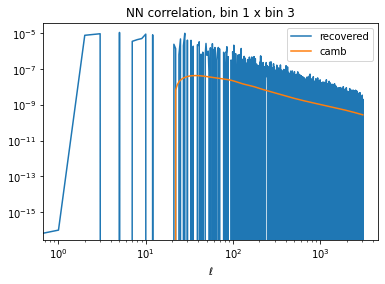

In [8]:
cl_recover = hp.anafast(maps[0], maps[2], lmax=3072)
plt.loglog(cl_recover,label='recovered')
plt.loglog(ell,clnn[1,3],label='camb')
plt.title('NN correlation, bin 1 x bin 3')
plt.legend()
plt.xlabel(r'$\ell$')

So is the correlation between 1st and 4th bin

Text(0.5, 0, '$\\ell$')

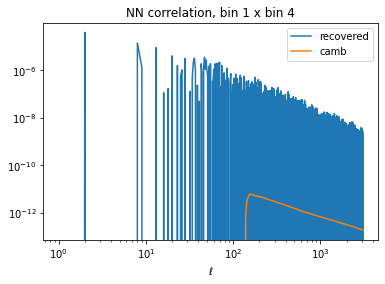

In [9]:
cl_recover = hp.anafast(maps[0], maps[3], lmax=3072)
plt.loglog(cl_recover,label='recovered')
plt.loglog(ell,clnn[1,4],label='camb')
plt.title('NN correlation, bin 1 x bin 4')
plt.legend()
plt.xlabel(r'$\ell$')

A few more checks...

Text(0.5, 0, '$\\ell$')

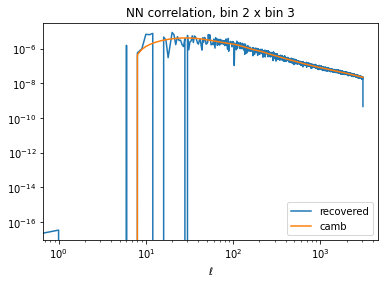

In [10]:
cl_recover = hp.anafast(maps[1], maps[2], lmax=3072)
plt.loglog(cl_recover,label='recovered')
plt.loglog(ell,clnn[2,3],label='camb')
plt.title('NN correlation, bin 2 x bin 3')
plt.legend()
plt.xlabel(r'$\ell$')

Text(0.5, 0, '$\\ell$')

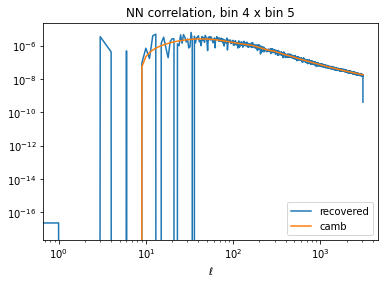

In [11]:
cl_recover = hp.anafast(maps[3], maps[4], lmax=3072)
plt.loglog(cl_recover,label='recovered')
plt.loglog(ell,clnn[4,5],label='camb')
plt.title('NN correlation, bin 4 x bin 5')
plt.legend()
plt.xlabel(r'$\ell$')

Text(0.5, 0, '$\\ell$')

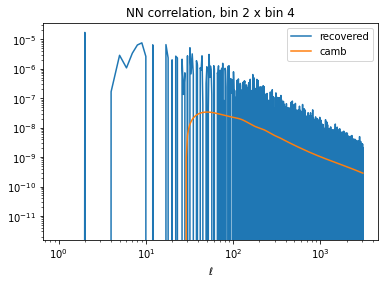

In [12]:
cl_recover = hp.anafast(maps[1], maps[3], lmax=3072)
plt.loglog(cl_recover,label='recovered')
plt.loglog(ell,clnn[2,4],label='camb')
plt.title('NN correlation, bin 2 x bin 4')
plt.legend()
plt.xlabel(r'$\ell$')